## Data Visualization

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data
from IPython.display import Image
import pickle
import seaborn as sns

<AxesSubplot: >

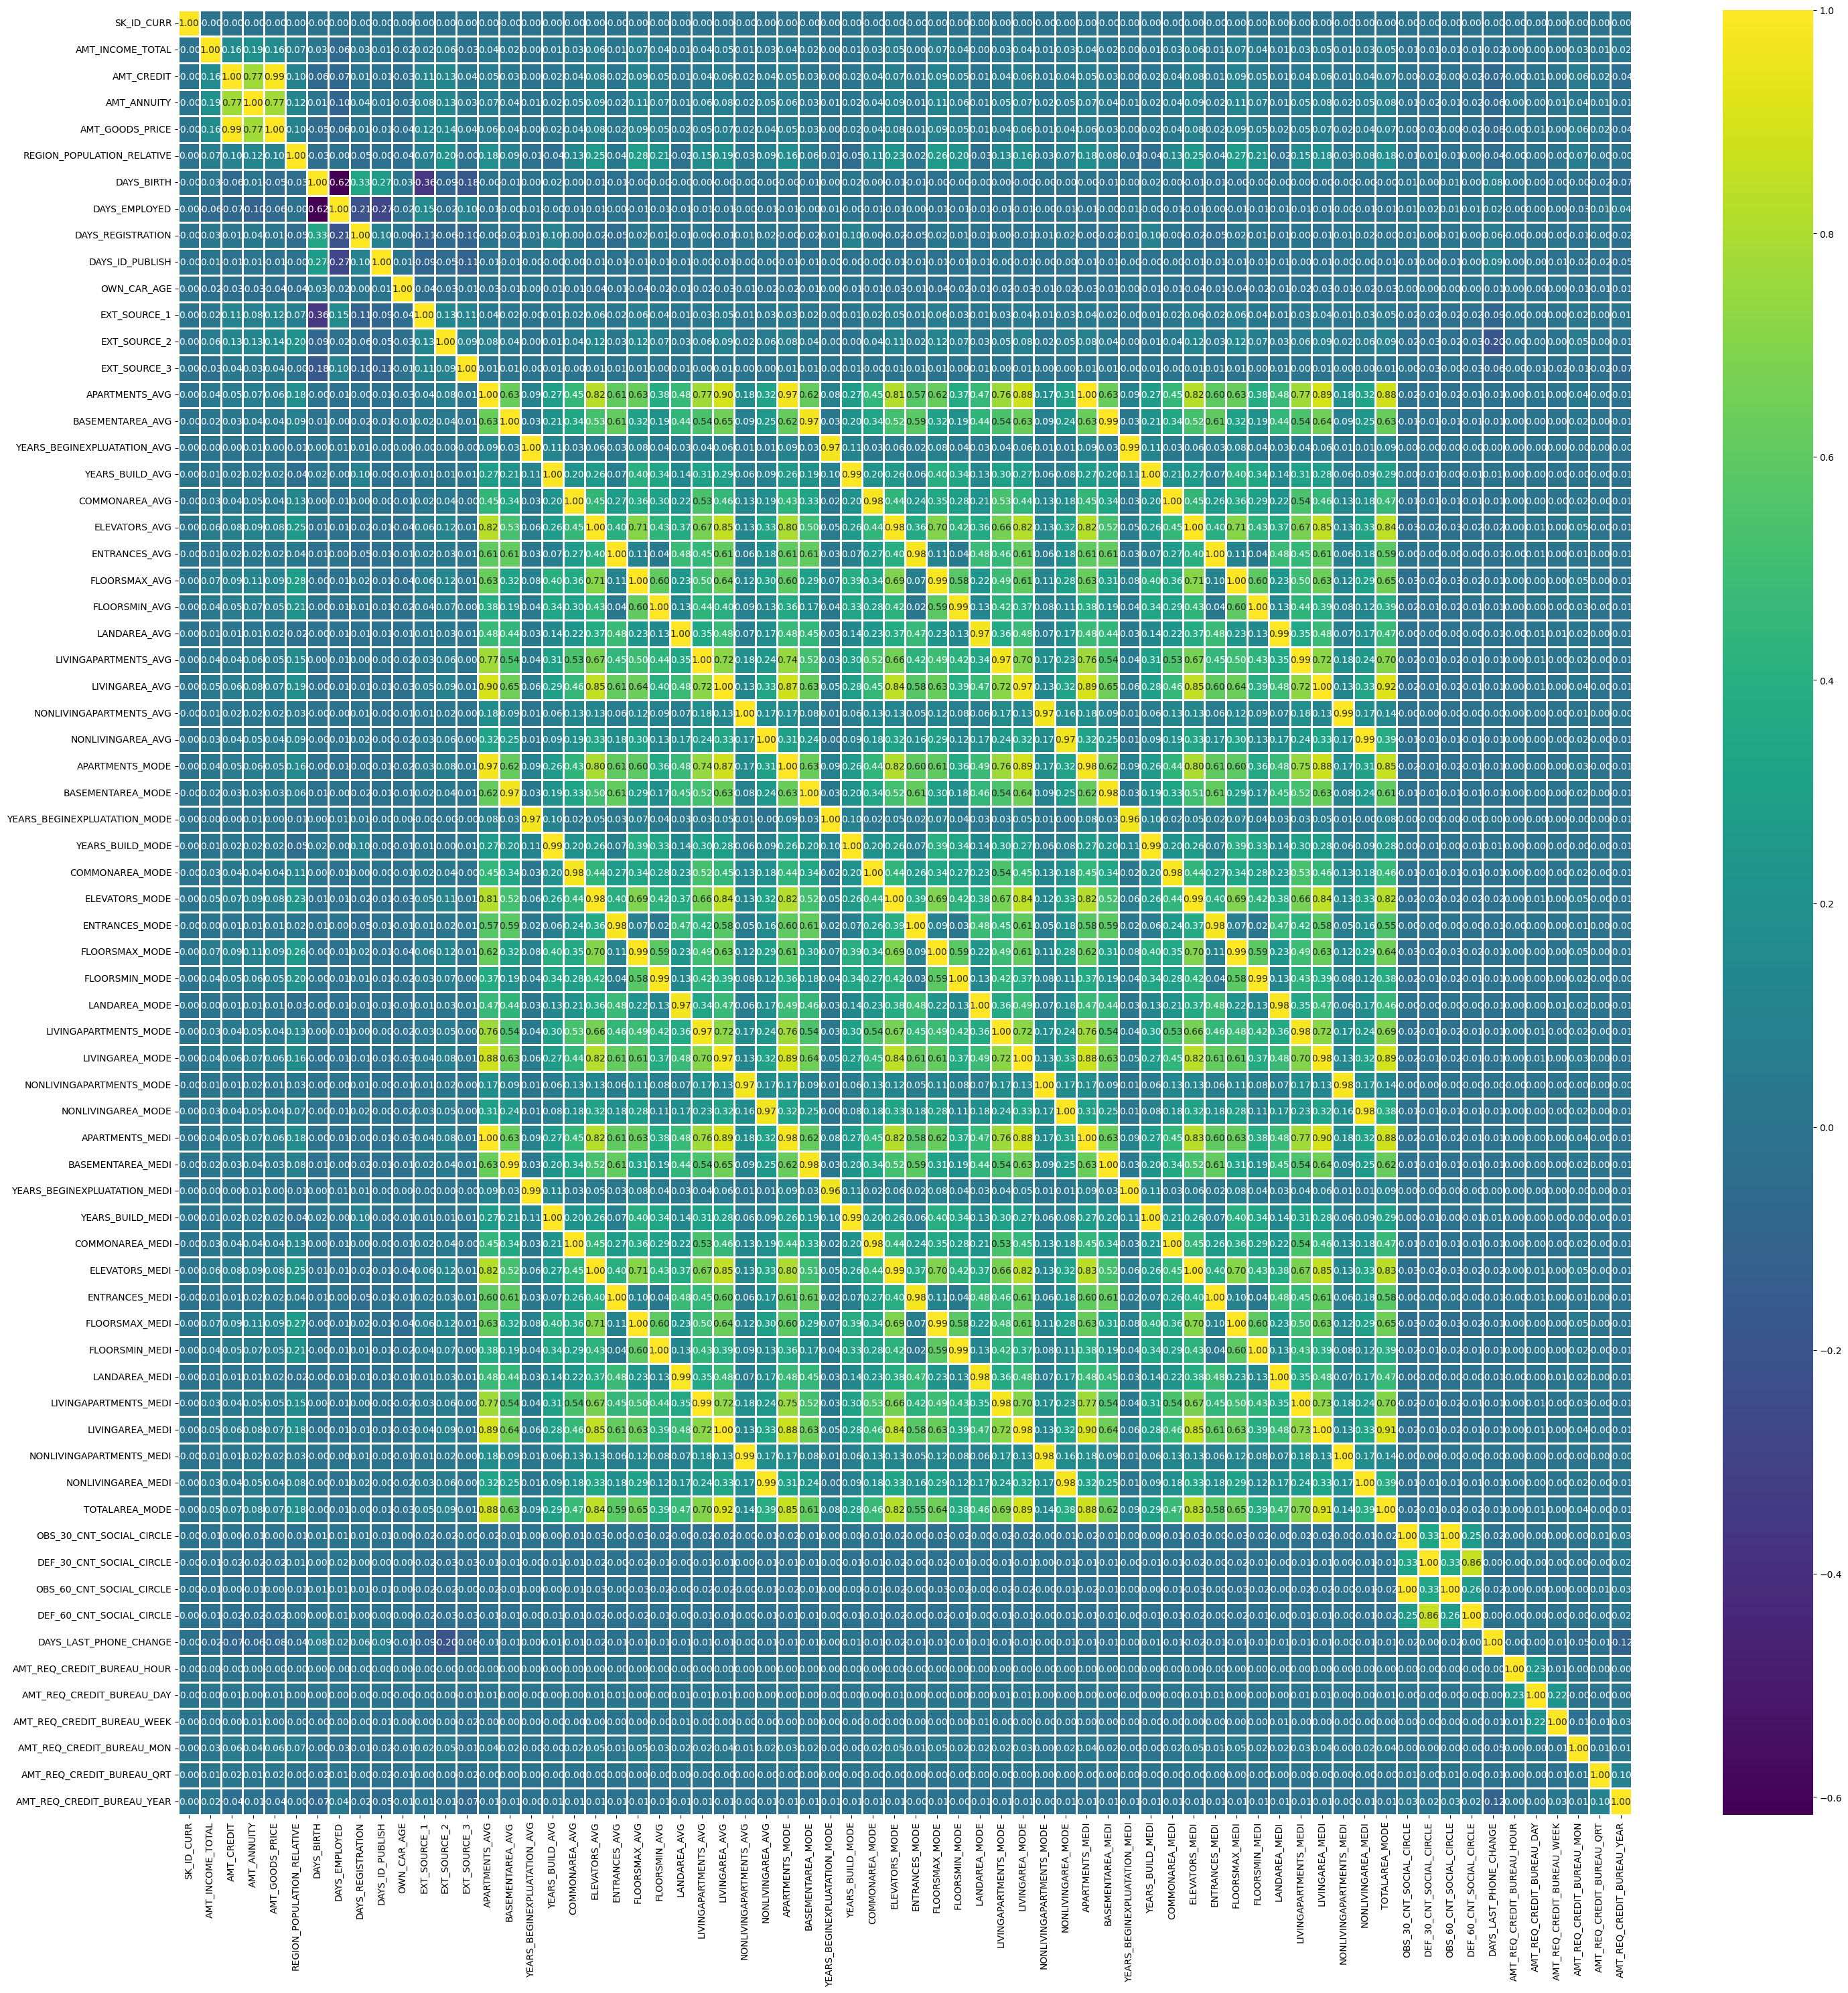

In [3]:
df = pd.read_csv("../data/processed/application_train.csv")
intermediate_train = pd.read_csv("../data/processed/train_before_normalisation.csv")
intermediate_test = pd.read_csv("../data/processed/test_before_normalisation.csv")
raw = pd.read_csv("../data/raw/application_train.csv")

fig, ax= plt.subplots(figsize = (35,35))
sns.heatmap(intermediate_train[["SK_ID_CURR","AMT_INCOME_TOTAL","AMT_CREDIT",
"AMT_ANNUITY","AMT_GOODS_PRICE","REGION_POPULATION_RELATIVE","DAYS_BIRTH",
"DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH","OWN_CAR_AGE",
"EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3","APARTMENTS_AVG","BASEMENTAREA_AVG",
"YEARS_BEGINEXPLUATATION_AVG","YEARS_BUILD_AVG","COMMONAREA_AVG","ELEVATORS_AVG"
,"ENTRANCES_AVG","FLOORSMAX_AVG","FLOORSMIN_AVG","LANDAREA_AVG","LIVINGAPARTMENTS_AVG",
"LIVINGAREA_AVG","NONLIVINGAPARTMENTS_AVG","NONLIVINGAREA_AVG","APARTMENTS_MODE",
"BASEMENTAREA_MODE","YEARS_BEGINEXPLUATATION_MODE","YEARS_BUILD_MODE","COMMONAREA_MODE","ELEVATORS_MODE","ENTRANCES_MODE","FLOORSMAX_MODE","FLOORSMIN_MODE","LANDAREA_MODE",
"LIVINGAPARTMENTS_MODE","LIVINGAREA_MODE","NONLIVINGAPARTMENTS_MODE","NONLIVINGAREA_MODE",
"APARTMENTS_MEDI","BASEMENTAREA_MEDI","YEARS_BEGINEXPLUATATION_MEDI","YEARS_BUILD_MEDI",
"COMMONAREA_MEDI","ELEVATORS_MEDI","ENTRANCES_MEDI","FLOORSMAX_MEDI","FLOORSMIN_MEDI","LANDAREA_MEDI",
"LIVINGAPARTMENTS_MEDI","LIVINGAREA_MEDI","NONLIVINGAPARTMENTS_MEDI","NONLIVINGAREA_MEDI","TOTALAREA_MODE",
"OBS_30_CNT_SOCIAL_CIRCLE","DEF_30_CNT_SOCIAL_CIRCLE","OBS_60_CNT_SOCIAL_CIRCLE",
"DEF_60_CNT_SOCIAL_CIRCLE","DAYS_LAST_PHONE_CHANGE","AMT_REQ_CREDIT_BUREAU_HOUR",
"AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_MON",
"AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_YEAR"]].corr(),cmap="viridis", annot = True, fmt = ".2f", linewidths=1, ax=ax)

<AxesSubplot: xlabel='TARGET', ylabel='count'>

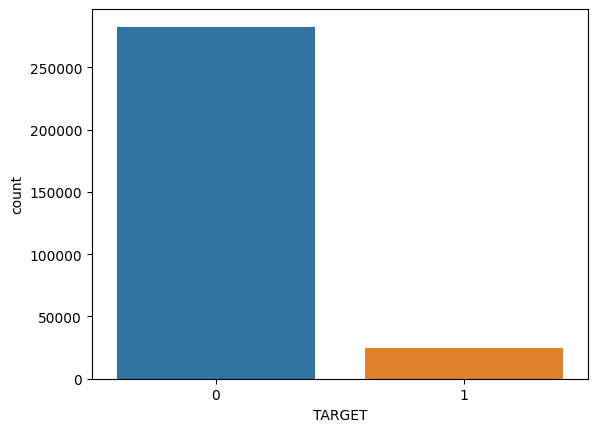

In [5]:
sns.countplot(x='TARGET',data=intermediate_train)

#### Visualise the weights associated to each feature of the logistic regression model

In [6]:
# Some such as default would be binary features, but since
# they have a third class "unknown" we'll process them as non binary categorical
num_features = ["CNT_CHILDREN",	"AMT_INCOME_TOTAL",	"AMT_CREDIT",	"AMT_ANNUITY",	"AMT_GOODS_PRICE", "REGION_POPULATION_RELATIVE",	"DAYS_BIRTH",	"DAYS_EMPLOYED",
	"DAYS_REGISTRATION",	"DAYS_ID_PUBLISH",	"OWN_CAR_AGE",	"FLAG_MOBIL",	"FLAG_EMP_PHONE",	"FLAG_WORK_PHONE",	"FLAG_CONT_MOBILE",	"FLAG_PHONE",	"FLAG_EMAIL",
    "CNT_FAM_MEMBERS",	"REGION_RATING_CLIENT",	"REGION_RATING_CLIENT_W_CITY", "HOUR_APPR_PROCESS_START",	"REG_REGION_NOT_LIVE_REGION",	"REG_REGION_NOT_WORK_REGION",	
    "LIVE_REGION_NOT_WORK_REGION",	"REG_CITY_NOT_LIVE_CITY","REG_CITY_NOT_WORK_CITY",	"LIVE_CITY_NOT_WORK_CITY",
    "EXT_SOURCE_1",	"EXT_SOURCE_2",	"EXT_SOURCE_3",	"APARTMENTS_AVG",	"BASEMENTAREA_AVG",	"YEARS_BEGINEXPLUATATION_AVG",	"YEARS_BUILD_AVG",	
    "COMMONAREA_AVG",	"ELEVATORS_AVG",	"ENTRANCES_AVG",	"FLOORSMAX_AVG",	"FLOORSMIN_AVG",	"LANDAREA_AVG",	"LIVINGAPARTMENTS_AVG",	
    "LIVINGAREA_AVG",	"NONLIVINGAPARTMENTS_AVG",	"NONLIVINGAREA_AVG",	"APARTMENTS_MODE",	"BASEMENTAREA_MODE",	"YEARS_BEGINEXPLUATATION_MODE",	
    "YEARS_BUILD_MODE",	"COMMONAREA_MODE",	"ELEVATORS_MODE",	"ENTRANCES_MODE",	"FLOORSMAX_MODE",	"FLOORSMIN_MODE",	"LANDAREA_MODE",	
    "LIVINGAPARTMENTS_MODE",	"LIVINGAREA_MODE",	"NONLIVINGAPARTMENTS_MODE",	"NONLIVINGAREA_MODE",	"APARTMENTS_MEDI",	"BASEMENTAREA_MEDI",	
    "YEARS_BEGINEXPLUATATION_MEDI",	"YEARS_BUILD_MEDI",	"COMMONAREA_MEDI",
    "ELEVATORS_MEDI",	"ENTRANCES_MEDI",	"FLOORSMAX_MEDI",	"FLOORSMIN_MEDI",	"LANDAREA_MEDI",
    "LIVINGAPARTMENTS_MEDI",	"LIVINGAREA_MEDI",	"NONLIVINGAPARTMENTS_MEDI",	"NONLIVINGAREA_MEDI", "TOTALAREA_MODE",
    "OBS_30_CNT_SOCIAL_CIRCLE",	"DEF_30_CNT_SOCIAL_CIRCLE",	"OBS_60_CNT_SOCIAL_CIRCLE",	"DEF_60_CNT_SOCIAL_CIRCLE",	
    "DAYS_LAST_PHONE_CHANGE",	"FLAG_DOCUMENT_2",	"FLAG_DOCUMENT_3",	"FLAG_DOCUMENT_4",	"FLAG_DOCUMENT_5",	"FLAG_DOCUMENT_6",	
    "FLAG_DOCUMENT_7",	"FLAG_DOCUMENT_8",	"FLAG_DOCUMENT_9",	"FLAG_DOCUMENT_10",	"FLAG_DOCUMENT_11",	"FLAG_DOCUMENT_12",	
    "FLAG_DOCUMENT_13",	"FLAG_DOCUMENT_14",	"FLAG_DOCUMENT_15",	"FLAG_DOCUMENT_16",	"FLAG_DOCUMENT_17",	"FLAG_DOCUMENT_18",
    "FLAG_DOCUMENT_19",	"FLAG_DOCUMENT_20",	"FLAG_DOCUMENT_21",	"AMT_REQ_CREDIT_BUREAU_HOUR",	"AMT_REQ_CREDIT_BUREAU_DAY",
    "AMT_REQ_CREDIT_BUREAU_WEEK",	"AMT_REQ_CREDIT_BUREAU_MON",	"AMT_REQ_CREDIT_BUREAU_QRT",	"AMT_REQ_CREDIT_BUREAU_YEAR"	
	]

cat_features = ["NAME_CONTRACT_TYPE","CODE_GENDER", "NAME_TYPE_SUITE","NAME_INCOME_TYPE",
                    "NAME_EDUCATION_TYPE","NAME_FAMILY_STATUS","NAME_HOUSING_TYPE", "OCCUPATION_TYPE", 
                    "WEEKDAY_APPR_PROCESS_START","ORGANIZATION_TYPE", "FONDKAPREMONT_MODE", "HOUSETYPE_MODE",
                    "WALLSMATERIAL_MODE", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", "EMERGENCYSTATE_MODE"]

In [14]:
# load the model from disk
filename = '../models/finalized_model.sav'
pipeline = pickle.load(open('../models/pipe.pkl', 'rb'))
preprocessor = pickle.load(open('../models/preprocessor.pkl', 'rb'))



In [27]:
train = pd.read_csv("../data/raw/application_train.csv").set_index('SK_ID_CURR')
X_test = pd.read_csv("../data/raw/application_test.csv").set_index('SK_ID_CURR')
y = train.TARGET

X_train, X_test = train.iloc[:, 1:240], train.iloc[:, 1:240]
y_train, y_test = train.TARGET, train.TARGET

# TODO:problème de fit des données
#pipeline.fit(X_train,y_train)

In [15]:
import eli5
from sklearn.pipeline import Pipeline

#pipeline.named_steps['preprocessing'].transformers[0][1].fit(X_train,y_train)

prepPipeline = Pipeline(
    [
        ('preprocessing', preprocessor)
    ]
)

eli5.show_weights(prepPipeline
   .named_steps['preprocessing'].transformers[0][1]\
   .named_steps['onehot'].get_feature_names(cat_features))

"""eli5.show_weights(pipeline
   .named_steps['preprocessing'].transformers[0][1]\
   .named_steps['onehot'].get_feature_names(cat_features))"""


#eli5.show_weights(pipeline.named_steps['preprocessing'].transformers[0][1].named_steps['onehot']).get_feature_names(cat_features)


NotFittedError: This OneHotEncoder instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [27]:
pipeline.named_steps['preprocessing'].transformers[0][2] 

AttributeError: 'Pipeline' object has no attribute 'transformers'

In [1]:
pipeline.named_steps['preprocessing'].named_steps['onehot']

NameError: name 'pipeline' is not defined

In [ ]:
lr_model['preprocessing'].transformers_[1][1]\
    ['onehot'].get_feature_names(cat_features)

KeyError: 'onehot'

That gives us the weights associated to each feature, that can be seen as the contribution of each feature into predicting that the class will be y=1 (the client will subscribe after the campaign).

The names for each features aren't really helping though, we can pass a list of column names to `eli5` but we'll need to do a little gymnastics first to extract names from our preprocessor in the pipeline (since we've generated new features on the fly with the one hot encoder)

In [ ]:
preprocessor = lr_model.named_steps["preprocessing"]

In [ ]:
ohe_categories = preprocessor.named_transformers_["categoricals"]#.categories_

In [ ]:
ohe_categories

Pipeline(steps=[('imputer_cat',
                 SimpleImputer(fill_value='missing', strategy='constant')),
                ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [ ]:
new_ohe_features = [f"{col}__{val}" for col, vals in zip(cat_features, ohe_categories) for val in vals]

In [ ]:
all_features = num_features + new_ohe_features

Great, so now we have a nice list of columns after processing. Let's visualise the data in a dataframe just for sanity check:

In [ ]:
pd.DataFrame(lr_model.named_steps["preprocessing"].transform(X_train), columns=all_features).head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,"WALLSMATERIAL_MODE__Stone, brick",WALLSMATERIAL_MODE__Wooden,WALLSMATERIAL_MODE__nan,FLAG_OWN_CAR__N,FLAG_OWN_CAR__Y,FLAG_OWN_REALTY__N,FLAG_OWN_REALTY__Y,EMERGENCYSTATE_MODE__No,EMERGENCYSTATE_MODE__Yes,EMERGENCYSTATE_MODE__nan
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.090534,-0.024402,-0.022529,-0.018305,-0.070987,-0.058766,-0.155837,-0.269947,-0.30862,-0.440926
1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.090534,-0.024402,-0.022529,-0.018305,-0.070987,-0.058766,-0.155837,-0.269947,-0.30862,-1.007331
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.090534,-0.024402,-0.022529,-0.018305,-0.070987,-0.058766,-0.155837,-0.269947,-0.30862,-1.007331
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.090534,-0.024402,-0.022529,-0.018305,-0.070987,-0.058766,-0.155837,-0.269947,-0.30862,-0.440926
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.090534,-0.024402,-0.022529,-0.018305,-0.070987,-0.058766,-0.155837,-0.269947,-0.30862,-1.007331


Looks good!

In [ ]:
#Write here the code to specify the feature_names of weights for lr_model (Use show_weights with feature_names parameter)
eli5.show_weights(lr_model.named_steps["clf"], feature_names=all_features)

Weight?,Feature
+6.352,OCCUPATION_TYPE__Medicine staff
+3.095,FLAG_PHONE
+1.587,HOUR_APPR_PROCESS_START
+1.510,FLAG_CONT_MOBILE
+1.475,CNT_FAM_MEMBERS
+1.383,OCCUPATION_TYPE__Security staff
+0.926,OCCUPATION_TYPE__High skill tech staff
+0.884,AMT_REQ_CREDIT_BUREAU_WEEK
+0.700,NAME_INCOME_TYPE__Commercial associate
+0.628,FLAG_DOCUMENT_17


Looks like it's picking principally on whether the month is march or not, the marketting campaign seem to have been more efficient in march?

#### We can also use `eli5` to explain a specific prediction, let's pick a row in the test data:

In [ ]:
i = 4
X_test.iloc[[i]]

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100038,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,Unaccompanied,Working,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
y_test.iloc[i]

0

Our client subsribed to the term deposit after the campaign! Let's see what our model would have predicted and how it would explain it.

We'll need to first transform our row into the format expected by our model as `eli5` cannot work directly with our pipeline.

Note: `eli5` actually does support pipeline, but with a limited number of transformations only. In our pipeline it does not support the `passthrough` transformation (which, funny enough, doesn't do anything...)

In [ ]:
#write here the code to explain a specific prediction of lr_model with show_prediction
eli5.show_prediction(lr_model.named_steps["clf"], 
                      lr_model.named_steps["preprocessing"].transform(X)[i],
                     feature_names=all_features, show_feature_values=True)